In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
airfoil_self_noise = fetch_ucirepo(id=291) 
  
# data (as pandas dataframes) 
X = airfoil_self_noise.data.features 
y = airfoil_self_noise.data.targets 
  
# metadata 
print(airfoil_self_noise.metadata) 
  
# variable information 
print(airfoil_self_noise.variables)


{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [5]:
X.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [6]:
y.head()

,scaled-sound-pressure
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461


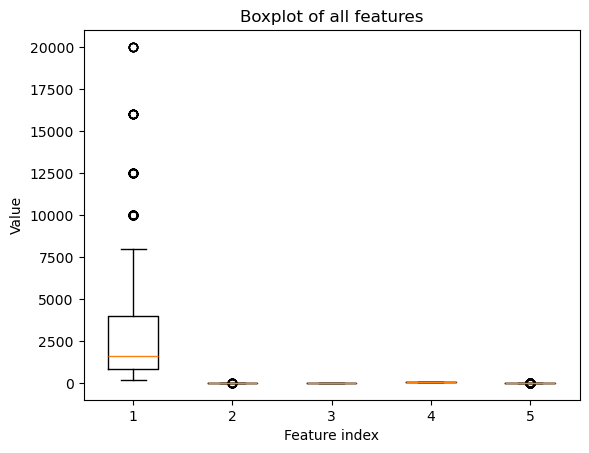

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(X)
plt.title("Boxplot of all features")
plt.xlabel("Feature index")
plt.ylabel("Value")
plt.show()


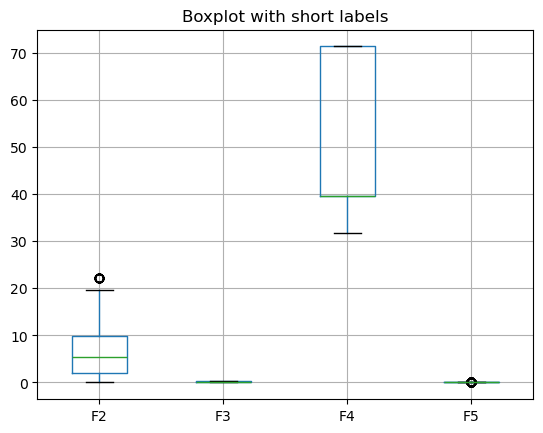

In [8]:
X.iloc[:, 1:5].set_axis(['F2', 'F3', 'F4', 'F5'], axis=1).boxplot()
plt.title("Boxplot with short labels")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #feature scaling

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.svm import SVR


linreg = LinearRegression()
tree = DecisionTreeRegressor(random_state=42)
svm_reg = SVR()

models = {"Linear Regression": linreg, "Decision Tree": tree,"Support Vector Machine": svm_reg}

# y_flat = y.to_numpy().ravel()
y_flat = y.values.ravel()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, model in models.items():
    scores = cross_val_score(model, X_scaled, y_flat, cv=kf, scoring='neg_mean_squared_error')
    print(f"\nModel: {i}") 
    print("  MSE (per fold):", -scores)
    print(f"  Average MSE: {-scores.mean():.4f}")


Model: Linear Regression
  MSE (per fold): [22.12864332 22.64550674 22.05603206 24.19999734 25.79123265]
  Average MSE: 23.3643

Model: Decision Tree
  MSE (per fold): [5.8761745  6.97770156 6.39430313 7.60144352 8.74368252]
  Average MSE: 7.1187

Model: Support Vector Machine
  MSE (per fold): [13.80199963 13.57722524 13.76879967 14.50575636 16.42807869]
  Average MSE: 14.4164
